Python program to implement Credit Card Fraud detection using Support Vector Machine classification.

Link for the Dataset:

https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

## The Code

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from IPython.display import display
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Load the dataset into a DataFrame

In [2]:
# Download the csv from the kaggle website and Load the dataset into a DataFrame
def load_dataset():
    df = pd.read_csv('card_transdata.csv')
    return df

### Function for applying DQM Checks

In [4]:
def data_quality_checks(df):
  # Handling missing values
  print("Missing values:\n", df.isnull().sum())
  df = df.dropna()

  # Check for duplicates
  print("Duplicate rows:\n", df.duplicated().sum())
  df = df.drop_duplicates()

  # Check for unique values in categorical columns
  print("Unique values in categorical columns:")
  for col in df.select_dtypes(include=['object']):
      print(col, df[col].nunique())

  # Check for outliers using z-score
  z_scores = np.abs(stats.zscore(df.select_dtypes(exclude=['object'])))
  print("Outliers:\n", (z_scores > 3).any(axis=1).sum())
  print("--------------------------------------------------------------------------------------------------------------------")

  return df

### Applying profiling and visualization

In [5]:
def profiling_visualization(df):
    # Display basic information about the dataset
    df.info()

    # Descriptive statistics
    display(df.describe())

    # Categorical feature profiling
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        display(df[col].value_counts())

    # Numerical feature profiling
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_columns:
        plt.figure(figsize=(5, 6))
        sns.distplot(df[col], color='g', bins=100, hist_kws={'alpha': 0.4});
        plt.title('Distribution of ' + col)
        plt.show()
    print("--------------------------------------------------------------------------------------------------------------------")

### Function for Feature engineering

In [6]:
def feature_engineering(df):
    # Convert categorical features into numerical format
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    # Remove class imbalance from the target variable present in the dataset
    # Assuming the target variable is 'Class'
    smote = SMOTE(random_state=42)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X_res, y_res = smote.fit_resample(X, y)
    print("--------------------------------------------------------------------------------------------------------------------")
    return pd.concat([X_res, y_res], axis=1)

### Train test split

In [7]:
def split_data(df):
  # Split the data into train test ratio for further processing using sklearn
  X = df.iloc[:, :-1]
  y = df.iloc[:, -1]
  # Split the data into train test ratio for further processing using sklearn
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

### Prediction using SVM

In [8]:
def SVM(X_train, X_test, y_train, y_test):
    # Code to instantiate the SVM model with proper hyperparameters
    SD = StandardScaler()
    X_train = SD.fit_transform(X_train)
    X_test = SD.transform(X_test)
    y_train_1d = np.ravel(y_train)

    # Code to train the SVM model
    S = SVC(C = 5 , kernel='rbf')
    S.fit(X_train, y_train_1d)

    # Code to predict target variable in the test data
    y_pred = S.predict(X_test)

    return y_pred, y_test

### Evaluate

In [9]:
def evaluate(pred_result, actual_result):
  # use different metrices to find score of predicted result
  print("classification_report:\n", classification_report(actual_result, pred_result))

  # Plot the confusion matrix
  cm = confusion_matrix(actual_result, pred_result)
  plt.figure(figsize=(10,7))
  sns.heatmap(cm, annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  plt.show()

### Main function to call the functions and to predict and evaluate the predictions

Missing values:
 distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64
Duplicate rows:
 0
Unique values in categorical columns:
Outliers:
 104695
--------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


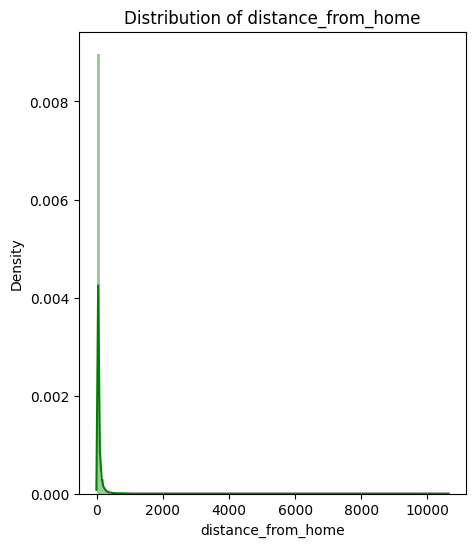

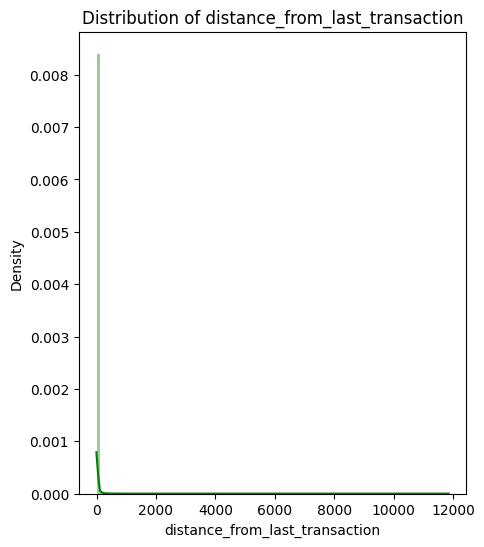

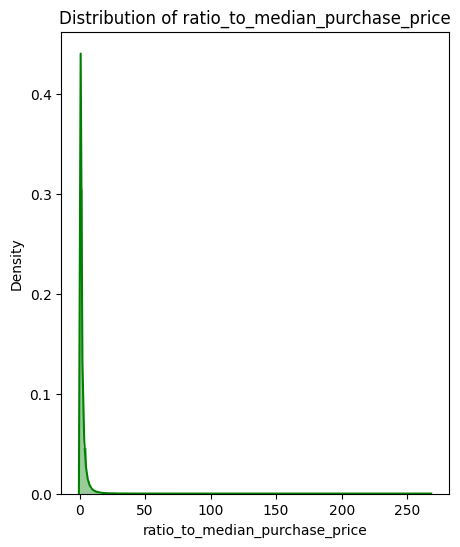

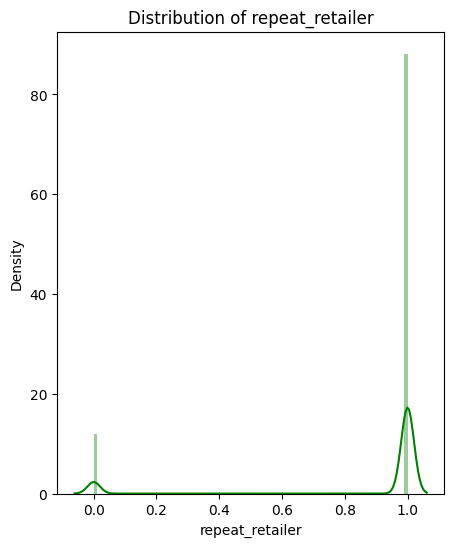

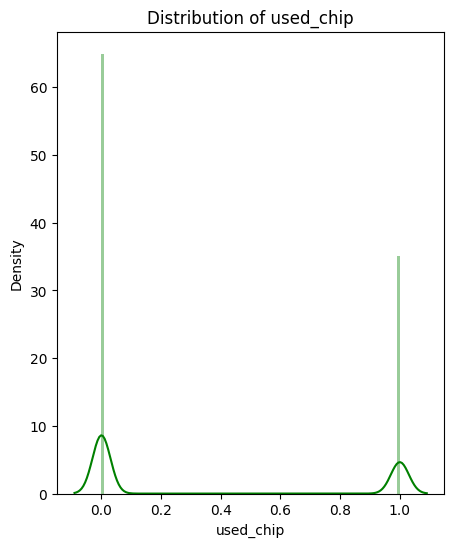

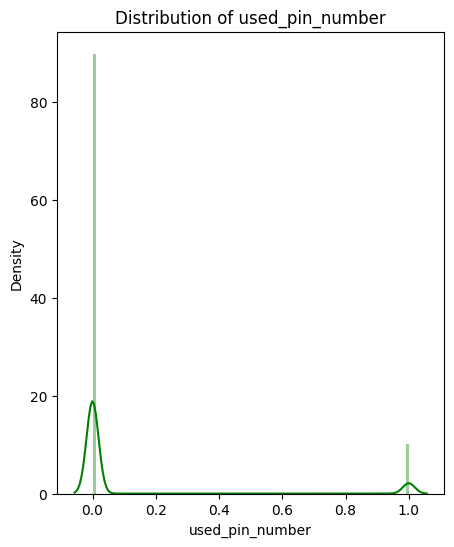

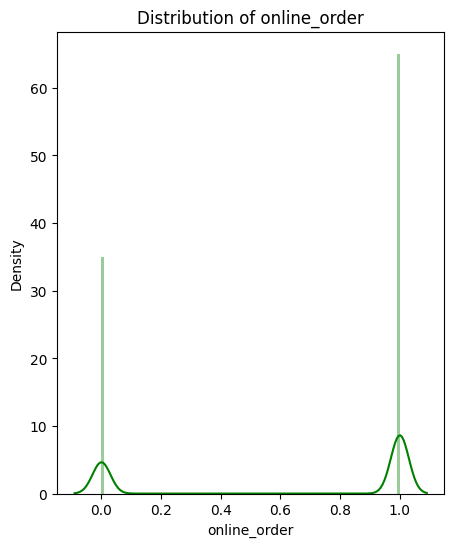

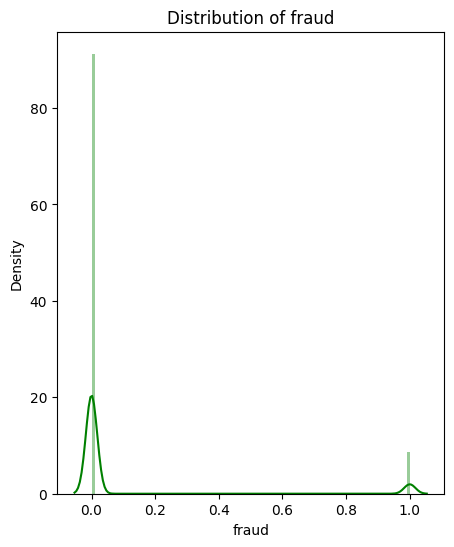

--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------


In [10]:
# Load the dataset
df = load_dataset()

# Perform data quality checks
df = data_quality_checks(df)

# Perform profiling and visualization
profiling_visualization(df)

# Perform feature engineering
df = feature_engineering(df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = split_data(df)

In [11]:
# Train the SVM model and make predictions
y_pred, y_test = SVM(X_train, X_test, y_train, y_test)

classification_report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    182421
         1.0       0.99      1.00      1.00    182618

    accuracy                           1.00    365039
   macro avg       1.00      1.00      1.00    365039
weighted avg       1.00      1.00      1.00    365039



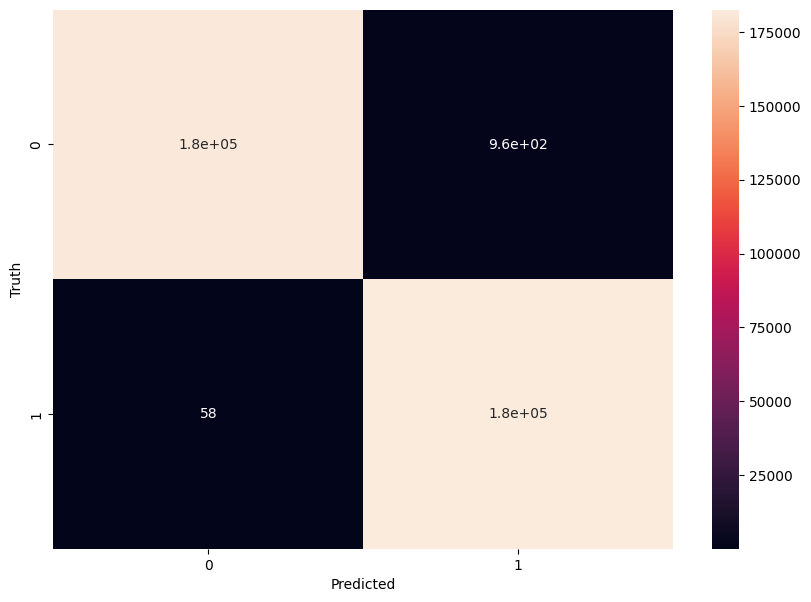

Accuracy score: 0.9972194751793644
Precision score: 0.9947852242571533
Recall score: 0.9996823971350032
F1 score: 0.9972277984896281


In [12]:
# Evaluate the predictions
evaluate(y_pred, y_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')